# Data Cleaning Using Pandas

Data cleaning is a crucial step in any data analysis project. It involves identifying and correcting errors, inconsistencies, and missing values within a dataset. A well-cleaned dataset ensures the accuracy and reliability of subsequent analyses.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Visualization

df = pd.read_csv("Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148850.000000,148241.000000,148846.000000,148846.000000,112687.000000,148850.000000,148850.000000,148850.000000,0.0,0.0
mean,74425.238320,66237.832588,5059.388913,3643.990496,24964.400586,74669.974821,93569.292314,2012.524589,NaN,NaN
std,42968.986043,42804.140614,11448.310643,8052.370363,15424.049263,50556.337473,62843.928192,1.118086,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37213.250000,33339.040000,0.000000,0.000000,11330.120000,35904.602500,43713.937500,2012.000000,NaN,NaN
50%,74425.500000,64957.620000,0.000000,806.475000,28607.770000,71364.020000,92322.405000,2013.000000,NaN,NaN
75%,111637.750000,94691.020000,4646.917500,4228.070000,35553.990000,105764.265000,132787.170000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [3]:
# Use the .info() method to find out how many entries there are.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148850 entries, 0 to 148849
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148850 non-null  int64  
 1   EmployeeName      148850 non-null  object 
 2   JobTitle          148850 non-null  object 
 3   BasePay           148241 non-null  float64
 4   OvertimePay       148846 non-null  float64
 5   OtherPay          148846 non-null  float64
 6   Benefits          112687 non-null  float64
 7   TotalPay          148850 non-null  float64
 8   TotalPayBenefits  148850 non-null  float64
 9   Year              148850 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148850 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.8+ MB


### Maximum OvertimePay
Find the highest OvertimePay value in the dataset.

In [4]:
# is the highest amount of OvertimePay in the dataset ?
df['OvertimePay'].max()

np.float64(245131.88)

### Average BasePay
Calculate the average BasePay.

In [5]:
# What is the average BasePay ?
df['BasePay'].mean()

np.float64(66237.83258794801)

## Querying Specific Rows
### Job Title of "JOSEPH DRISCOLL"
We will use a filter to query information about this employee.

In [6]:

# Get all details of JOSEPH DRISCOLL
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']

# Get only the JobTitle of JOSEPH DRISCOLL
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

##### Total Pay (Including Benefits) for "JOSEPH DRISCOLL"


In [7]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']


24    270324.91
Name: TotalPayBenefits, dtype: float64

## Aggregations and Insights
### Highest Paid Person (Including Benefits)

In [8]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


### Unique Job Titles
Two ways to find the number of unique job titles:

In [9]:

# Method 1
df['JobTitle'].nunique()


2159

In [10]:

# Method 2
len(df['JobTitle'].unique())

2159

### Top 5 Most Common Jobs

In [11]:
# Method 1
df['JobTitle'].value_counts()[:5]


JobTitle
Transit Operator                7036
Special Nurse                   4403
Registered Nurse                3740
Public Svc Aide-Public Works    2536
Police Officer 3                2421
Name: count, dtype: int64

In [12]:

# Method 2
df['JobTitle'].value_counts().head(5)

JobTitle
Transit Operator                7036
Special Nurse                   4403
Registered Nurse                3740
Public Svc Aide-Public Works    2536
Police Officer 3                2421
Name: count, dtype: int64

## Handling Duplicates
### Count Duplicate Rows

In [13]:
df.duplicated().sum()

np.int64(196)

### Remove Duplicate Rows

In [14]:
df = df.drop_duplicates()

# Verify that duplicates are removed
df.duplicated().sum()

np.int64(0)


## Visualizing the Data
### Distribution of Base Pay
We will plot a histogram to visualize the distribution of BasePay.

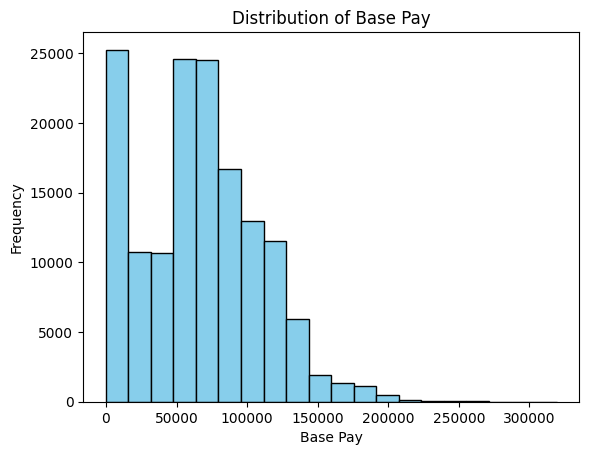

In [15]:
plt.hist(df['BasePay'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Base Pay')
plt.ylabel('Frequency')
plt.title('Distribution of Base Pay')
plt.show()

### Relationship Between Base Pay and Overtime Pay
A scatter plot will help visualize this relationship.


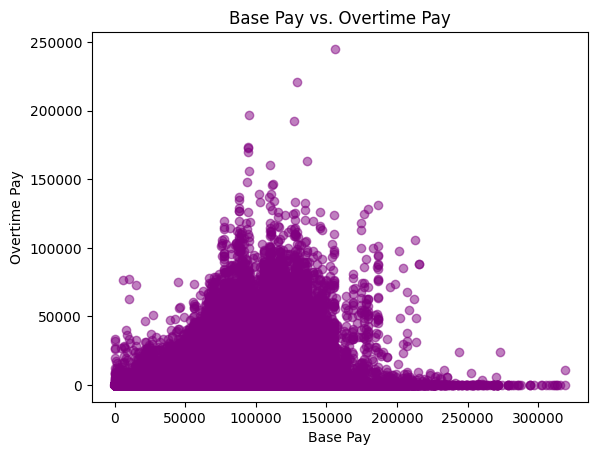

In [16]:

plt.scatter(df['BasePay'], df['OvertimePay'], alpha=0.5, color='purple')
plt.xlabel('Base Pay')
plt.ylabel('Overtime Pay')
plt.title('Base Pay vs. Overtime Pay')
plt.show()
